# Assignment_3.2_Vayuvegula_Soma_Shekar_Python

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import squarify

In [2]:
#Read csv
df_unemp = pd.read_csv("unemployement-rate-1948-2010.csv")
df_unemp.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [3]:
unemp_df=df_unemp.groupby('Year')['Value'].sum()
unemp_df=unemp_df.to_frame().reset_index()
unemp_df.head()

,Year,Value
0,1948,45.0
1,1949,72.6
2,1950,62.5
3,1951,39.4
4,1952,36.3


In [4]:
#Read text file
df_exp = pd.read_csv("expenditures.txt",sep='\t',lineterminator='\r')
df_exp.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


# Tree Map

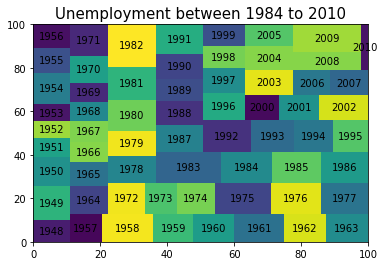

In [5]:
squarify.plot(sizes=round(unemp_df['Value']), label=unemp_df['Year'].astype(str), alpha=1 )
plt.title("Unemployment between 1984 to 2010", size=15)
plt.savefig("Python_Tree_Map.png")
plt.show()
plt.close()

# Area Chart

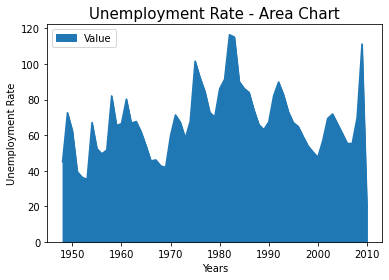

In [6]:
unemp_df.plot.area(x="Year",y="Value")
plt.ylabel("Unemployment Rate")
plt.xlabel("Years")
plt.title("Unemployment Rate - Area Chart",size=15)
plt.savefig("Python_Area_chart.png")
plt.show()
plt.close()

# Stacked Area Chart

In [7]:
#Pivoting expenditure df
df_exp_pivot=pd.pivot_table(df_exp,values='expenditure',index=['year'],columns='category').reset_index()
index=df_exp_pivot['year']
df_exp_pivot.head()

category,year,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
0,1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1,1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
2,1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
3,1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
4,1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093


In [8]:
data_columns = list(df_exp_pivot.columns)
data_columns.remove('year')
data_columns

['Alcoholic Beverages',
 'Apparel',
 'Cash Contributions',
 'Education',
 'Entertainment',
 'Food',
 'Healthcare',
 'Housing',
 'Miscellaneous',
 'Personal Care',
 'Personal Insurance',
 'Reading',
 'Tobacco Products',
 'Transportation']

In [9]:
data_temp = df_exp_pivot[data_columns].copy()

rec = data_temp.to_records(index=False)
data = list(rec)

temp_df = pd.DataFrame(data_temp, columns=data_columns)

col = list(data_temp.columns.values)

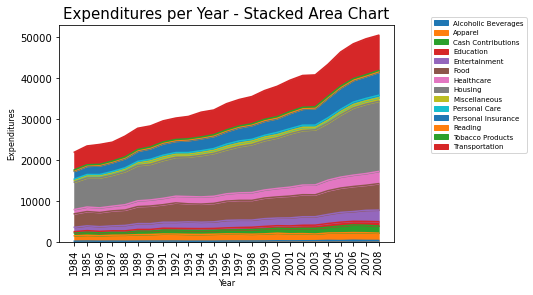

In [10]:
pos=(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24)
axs=temp_df.plot.area(stacked=True,xticks=pos,rot=90)
axs.set_xticklabels(index)
plt.ylabel("Expenditures",size=8)
plt.xlabel("Year",size=8)
plt.title("Expenditures per Year - Stacked Area Chart",size=15)
axs.legend(bbox_to_anchor=(1.1,1.05),prop={"size":7})
plt.savefig("Python_Stacked_Area.png")
plt.show()
plt.close()